In [11]:
import numpy as np
import os
import re
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

In [43]:
#dir_files = '../weights_CL/cifar100/with_inst_params_lr_0.2_40frac_corrupt/'
dir_files = '../weights_CL/cifar100/with_inst_params_lr_0.4_40frac_corrupt/'

In [44]:
all_files = os.listdir(dir_files)

In [45]:
# Filter files that end with '.tar' and start with 'epoch_'
epoch_files = [file for file in all_files if file.endswith('.tar') and file.startswith('epoch_')]

In [46]:
# Function to extract the numerical part from the file name
def extract_number(file_name):
    match = re.search(r'(\d+)', file_name)
    return int(match.group()) if match else 0

In [47]:
# Sort the files based on the numerical part
epoch_files.sort(key=extract_number)
epochs = [extract_number(x) for x in epoch_files]

In [48]:
print(epoch_files)

['epoch_0.pth.tar', 'epoch_1.pth.tar', 'epoch_2.pth.tar', 'epoch_3.pth.tar', 'epoch_4.pth.tar', 'epoch_5.pth.tar', 'epoch_6.pth.tar', 'epoch_7.pth.tar', 'epoch_8.pth.tar', 'epoch_9.pth.tar', 'epoch_10.pth.tar', 'epoch_11.pth.tar', 'epoch_12.pth.tar', 'epoch_13.pth.tar', 'epoch_14.pth.tar', 'epoch_15.pth.tar', 'epoch_16.pth.tar', 'epoch_17.pth.tar', 'epoch_18.pth.tar', 'epoch_19.pth.tar', 'epoch_20.pth.tar', 'epoch_21.pth.tar', 'epoch_22.pth.tar', 'epoch_23.pth.tar', 'epoch_24.pth.tar', 'epoch_25.pth.tar', 'epoch_26.pth.tar', 'epoch_27.pth.tar', 'epoch_28.pth.tar', 'epoch_29.pth.tar', 'epoch_30.pth.tar', 'epoch_31.pth.tar', 'epoch_32.pth.tar', 'epoch_33.pth.tar', 'epoch_34.pth.tar', 'epoch_35.pth.tar', 'epoch_36.pth.tar', 'epoch_37.pth.tar', 'epoch_38.pth.tar', 'epoch_39.pth.tar', 'epoch_40.pth.tar', 'epoch_41.pth.tar', 'epoch_42.pth.tar', 'epoch_43.pth.tar', 'epoch_44.pth.tar', 'epoch_45.pth.tar', 'epoch_46.pth.tar', 'epoch_47.pth.tar', 'epoch_48.pth.tar', 'epoch_49.pth.tar', 'epoch_50

## Calculate the accuracy of detection of noisy-samples over the course of epochs

In [57]:
num_elements = 50000
frac_corrupt = 0.40
num_corrupt = int(num_elements * frac_corrupt)
inst_params_over_epochs = np.zeros((len(epochs), num_elements))
detect_corrupt_acc = []
for idx, file in tqdm(enumerate(epoch_files), total=len(epoch_files)):
    file_path = os.path.join(dir_files, file)
    inst_params = np.exp(torch.load(file_path)['inst_parameters'])
    idx_high_temperature = np.argsort(inst_params)[::-1]
    detect_corrupt_acc.append((idx_high_temperature[:num_corrupt] <= num_corrupt).mean())
    inst_params_over_epochs[idx, :] = inst_params



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [01:01<00:00,  1.97it/s]


Text(0, 0.5, 'Corrupt label detection accuracy')

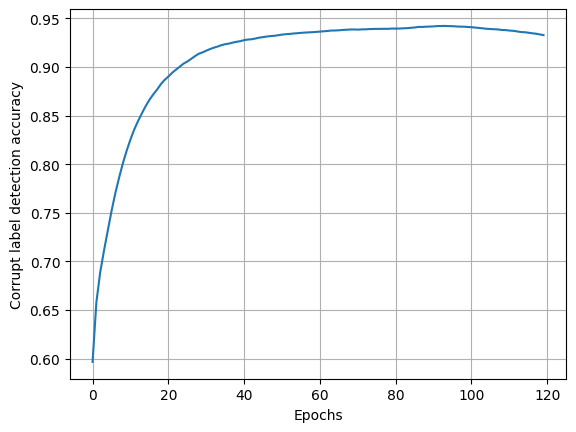

In [50]:
plt.plot(epochs, detect_corrupt_acc)
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Corrupt label detection accuracy')

## Calculate overall accuracy of noisy-outlier detection

In [51]:
corrupt_gt = np.zeros((num_elements))
corrupt_gt[:num_corrupt] = 1
corrupt_gt = np.bool_(corrupt_gt)

In [52]:
# Generate prediction
corrupt_predict = np.zeros((num_elements))
corrupt_predict[idx_high_temperature[:num_corrupt]] = 1
corrupt_predict = np.bool_(corrupt_predict)

In [53]:
overall_accuracy = 100*(corrupt_predict == corrupt_gt).mean()

In [54]:
print(f'Overall accuracy for classification of outliers: {overall_accuracy:0.2f}')

Overall accuracy for classification of outliers: 94.62


## Plot the mean and standard-deviation in temperature over epochs

In [60]:
mean_clean, mean_corrupt = [], []
std_clean, std_corrupt = [], []
for idx in range(len(epoch_files)):
    inst_params = inst_params_over_epochs[idx, :]
    inst_params_corrupt = inst_params[:num_corrupt]
    inst_params_clean = inst_params[num_corrupt:]
    mean_clean.append(inst_params_clean.mean())
    mean_corrupt.append(inst_params_corrupt.mean())

    std_clean.append(inst_params_clean.std())
    std_corrupt.append(inst_params_corrupt.std())

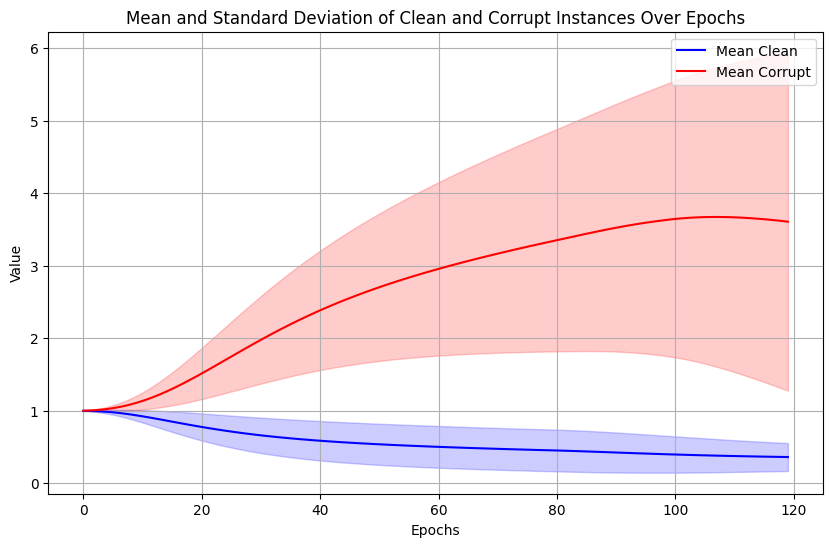

In [61]:
# Create a plot
plt.figure(figsize=(10, 6))

# Plot mean and mean±std for clean instances
plt.plot(epochs, mean_clean, label='Mean Clean', color='blue')
plt.fill_between(epochs, 
                 [m - s for m, s in zip(mean_clean, std_clean)], 
                 [m + s for m, s in zip(mean_clean, std_clean)], 
                 color='blue', alpha=0.2)

# Plot mean and mean±std for corrupt instances
plt.plot(epochs, mean_corrupt, label='Mean Corrupt', color='red')
plt.fill_between(epochs, 
                 [m - s for m, s in zip(mean_corrupt, std_corrupt)], 
                 [m + s for m, s in zip(mean_corrupt, std_corrupt)], 
                 color='red', alpha=0.2)

# Adding titles and labels
plt.title('Mean and Standard Deviation of Clean and Corrupt Instances Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.grid()
plt.legend()


In [66]:
inst_params = inst_params_over_epochs[80, :]

In [69]:
np.sort(inst_params[:num_corrupt])[:100]

array([0.2014033 , 0.21821491, 0.22917734, 0.22943559, 0.23669684,
       0.23869266, 0.23901451, 0.24060275, 0.24731101, 0.24778998,
       0.24891134, 0.2507861 , 0.25189054, 0.25293657, 0.26265961,
       0.26345235, 0.26553422, 0.26738471, 0.26741448, 0.26823795,
       0.2693755 , 0.27005363, 0.27038831, 0.27135739, 0.27307001,
       0.27312908, 0.27784491, 0.27813545, 0.27924919, 0.27973327,
       0.28070647, 0.28164157, 0.28189996, 0.28236499, 0.2826173 ,
       0.28358892, 0.28473121, 0.28504917, 0.28515968, 0.2859906 ,
       0.28989619, 0.29058442, 0.29095411, 0.29239106, 0.29258257,
       0.29452822, 0.29602277, 0.29675621, 0.2969093 , 0.2969121 ,
       0.29754996, 0.29809269, 0.29848865, 0.29871377, 0.29894748,
       0.29906967, 0.2994127 , 0.29999009, 0.30024713, 0.30050483,
       0.30068475, 0.3015919 , 0.30196398, 0.30285835, 0.30308816,
       0.30473176, 0.30582142, 0.30593708, 0.30617684, 0.30918884,
       0.31035709, 0.31082299, 0.31092289, 0.31117073, 0.31254